In [1]:
import spacy
import matplotlib.pyplot as plt
from heapq import nlargest
import pandas as pd


In [2]:
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from docx import Document

In [21]:
document = Document('./../Linss-Lukas-ba.docx')

In [22]:
paragraphs = document.paragraphs
text = ''.join([paragraph.text for paragraph in document.paragraphs])

# for i, p in enumerate(paragraphs):
#     #if len(p.text) > 100:
#     text += p.text

In [23]:
doc = nlp(text)

In [24]:
ents = {}

for ent in doc.ents:
    if ent.text in ents.keys():
        ents[ent.text] +=  1
    else:
        ents[ent.text] = 1




In [25]:
ent_arr = sorted(ents, key=ents.get)[-20:]

In [26]:
data  = [[x, ents[x]] for x in ent_arr]

In [27]:
data

[['ECS', 6],
 ['nine', 6],
 ['today', 7],
 ['Blender', 7],
 ['eight', 8],
 ['AR', 8],
 ['2019', 8],
 ['one', 9],
 ['Nike', 9],
 ['TypeScript', 9],
 ['three', 10],
 ['five', 10],
 ['four', 10],
 ['UGC', 11],
 ['Roblox', 13],
 ['first', 13],
 ['VR', 19],
 ['two', 20],
 ['Worldline', 22],
 ['Decentraland', 48]]

In [28]:
df = pd.DataFrame(data=data, columns=['Entity', 'Occurences'], index=ent_arr)

<Axes: title={'center': 'BA Lukas - Top 10 Entities'}>

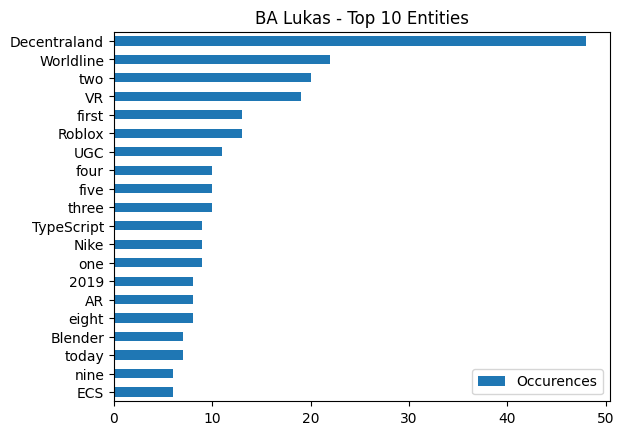

In [29]:
df.plot.barh(title='BA Lukas - Top 10 Entities')